In [1]:
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 显示图片
def showImage(path: str, type =  cv2.IMREAD_COLOR):
  image = cv2.imread(path, type)
  cv2.imshow('image' , image)
  cv2.waitKey(3000)
  cv2.destroyAllWindows()
  cv2.waitKey(1)
  return image

In [3]:
image = showImage('./assets/01/image.jpg', cv2.IMREAD_GRAYSCALE)
print('img:', image)
print('img shape', image.shape)
 

img: [[239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]
 ...
 [108  88  80 ... 129 153 185]
 [ 97  76  69 ... 110 131 159]
 [ 96  74  67 ... 102 119 141]]
img shape (512, 512)


In [5]:
# 显示视频
def showVideo(path, type =  cv2.IMREAD_COLOR):
  vc = cv2.VideoCapture(path)
  print(type)
  if vc.isOpened():
    while True:
      opened, frame = vc.read()
      if opened:
        image = cv2.cvtColor(frame, type)
        cv2.imshow('image' , image)
        cv2.waitKey(10)
      else:
        break 
  vc.release()
  cv2.destroyAllWindows()
  cv2.waitKey(1)
  return vc

In [57]:
video = showVideo('./assets/01/video.mp4', cv2.COLOR_BGR2GRAY)
print('video:', video)

0
6
video: < cv2.VideoCapture 0x154d09d10>


In [62]:
# ROI 图片截取

image_roi = image[100:300,100:300]
cv2.imshow('roi', image_roi)
cv2.waitKey(3000)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [75]:
# 颜色通道提取 
image = showImage('./assets/01/image.jpg')
b,g,r = cv2.split(image)
print('b:',b,b.shape)
print('g:',g,g.shape)
print('r:',r,r.shape)
image_merge = cv2.merge((b,g,r))
print(image_merge.shape)

b: [[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [120 100  92 ... 133 157 187]
 [108  87  80 ... 114 135 163]
 [107  85  78 ... 107 123 145]] (512, 512)
g: [[239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]
 ...
 [111  91  83 ... 130 154 187]
 [101  80  73 ... 112 132 160]
 [100  78  71 ... 104 120 142]] (512, 512)
r: [[239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]
 [239 239 239 ... 239 239 239]
 ...
 [ 97  77  69 ... 125 149 181]
 [ 84  63  56 ... 104 127 155]
 [ 83  61  54 ...  96 115 137]] (512, 512)
(512, 512, 3)


In [85]:
# B 通道
img_b = image.copy()
img_b[:,:,1]=0
img_b[:,:,2]=0
cv2.imshow('image_b',img_b)
cv2.waitKey(1000)
cv2.destroyAllWindows()
cv2.waitKey(1)

# G 通道
img_g = image.copy()
img_g[:,:,0]=0
img_g[:,:,2]=0
cv2.imshow('image_g',img_g)
cv2.waitKey(1000)
cv2.destroyAllWindows()
cv2.waitKey(1)

# R 通道
img_r = image.copy()
img_r[:,:,0]=0
img_r[:,:,1]=0
cv2.imshow('image_r',img_r)
cv2.waitKey(1000)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

(<Axes: title={'center': 'CONSTANT'}>,
 Text(0.5, 1.0, 'CONSTANT'))

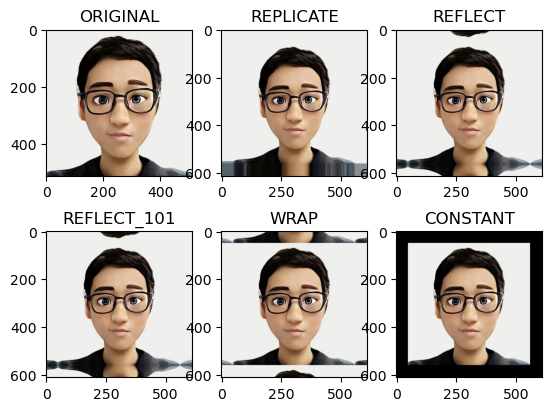

In [71]:
# 边界填充
import matplotlib.pyplot as plt
top_size, bottom_size, left_size, right_size = (50,50,50,50)
image = cv2.imread('./assets/01/image.jpg')
img = image[:,:,::-1] # BGR -> RGB

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)


plt.subplot(231), plt.imshow(img,'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate,'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect,'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101,'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap,'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant,'gray'), plt.title('CONSTANT')



'cba'

(<Axes: title={'center': '5'}>,
 Text(0.5, 1.0, '5'))

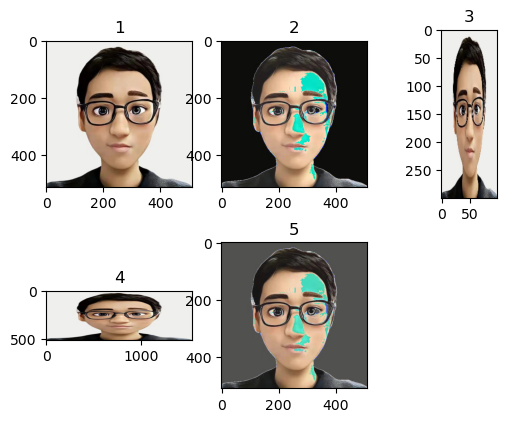

In [62]:
# 数值计算

image = cv2.imread('./assets/01/image.jpg',cv2.IMREAD_COLOR) # BGR
image1 = image[:,:,::-1] # BGR -> RGB
image2 = image1 + 30
image3 = cv2.resize(image1, (100,300))
image4 = cv2.resize(image1, (0,0), fx=3,fy=1)
image5 = cv2.addWeighted(image1,0.3,image2,0.7,0)

plt.subplot(231), plt.imshow(image1), plt.title('1')
plt.subplot(232), plt.imshow(image2), plt.title('2')
plt.subplot(233), plt.imshow(image3), plt.title('3')
plt.subplot(234), plt.imshow(image4), plt.title('4')
plt.subplot(235), plt.imshow(image5), plt.title('5')


